In [1]:
import pandas as pd
import numpy as np
from herramientas import obtener_resumen_valores_unicos

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [4]:
obtener_resumen_valores_unicos(df)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,id,int64,1235,1235,0
1,surgery,object,2,1235,0
2,age,object,2,1235,0
3,hospital_number,int64,255,1235,0
4,rectal_temp,float64,43,1235,0
5,pulse,float64,50,1235,0
6,respiratory_rate,float64,37,1235,0
7,temp_of_extremities,object,4,1196,39
8,peripheral_pulse,object,4,1175,60
9,mucous_membrane,object,6,1214,21


In [5]:
# Eliminar filas con valores nulos
df = df.dropna()

In [6]:
df = df.drop('id', axis=1)

In [7]:
obtener_resumen_valores_unicos(df)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,surgery,object,2,771,0
1,age,object,2,771,0
2,hospital_number,int64,213,771,0
3,rectal_temp,float64,39,771,0
4,pulse,float64,49,771,0
5,respiratory_rate,float64,34,771,0
6,temp_of_extremities,object,4,771,0
7,peripheral_pulse,object,4,771,0
8,mucous_membrane,object,6,771,0
9,capillary_refill_time,object,3,771,0


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['outcome'] = label_encoder.fit_transform(df['outcome'])


In [9]:
# Lista de nombres de las variables categóricas que deseas codificar
variables_categoricas = ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'abdomo_appearance', 'surgical_lesion', 'cp_data', 'rectal_exam_feces', 'abdomen']

# Aplicar one-hot encoding a todas las variables categóricas en la lista
df_encoded = pd.get_dummies(df, columns=variables_categoricas, drop_first=True)


In [10]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('outcome', axis=1)
y = df_encoded['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)


# modelo Random Forest Classifier

In [11]:
# Importa el modelo Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Crea una instancia del modelo
model = RandomForestClassifier(n_estimators=100, random_state=15)

# Paso 5: Entrenamiento del modelo
model.fit(X_train, y_train)

# Paso 6: Evaluación del modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

# Paso 7: Ajuste final del modelo (si es necesario)

# Paso 8: Predicciones en nuevos datos
# Puedes usar model.predict() para hacer predicciones en nuevos datos

Accuracy: 0.7161290322580646
Confusion Matrix:
[[54  1 16]
 [ 5  8  6]
 [14  2 49]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        71
           1       0.73      0.42      0.53        19
           2       0.69      0.75      0.72        65

    accuracy                           0.72       155
   macro avg       0.72      0.65      0.67       155
weighted avg       0.72      0.72      0.71       155



# xgboost

In [12]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Deshabilitar las advertencias
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Entrenamiento del modelo XGBoost
model = xgb.XGBClassifier()
model.fit(X_train, y_train)


# Evaluación del modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)


warnings.filterwarnings('default', category=FutureWarning)
warnings.filterwarnings('default', category=DeprecationWarning)


Accuracy: 0.7032258064516129
Confusion Matrix:
[[53  2 16]
 [ 4  9  6]
 [13  5 47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.75        71
           1       0.56      0.47      0.51        19
           2       0.68      0.72      0.70        65

    accuracy                           0.70       155
   macro avg       0.67      0.65      0.66       155
weighted avg       0.70      0.70      0.70       155



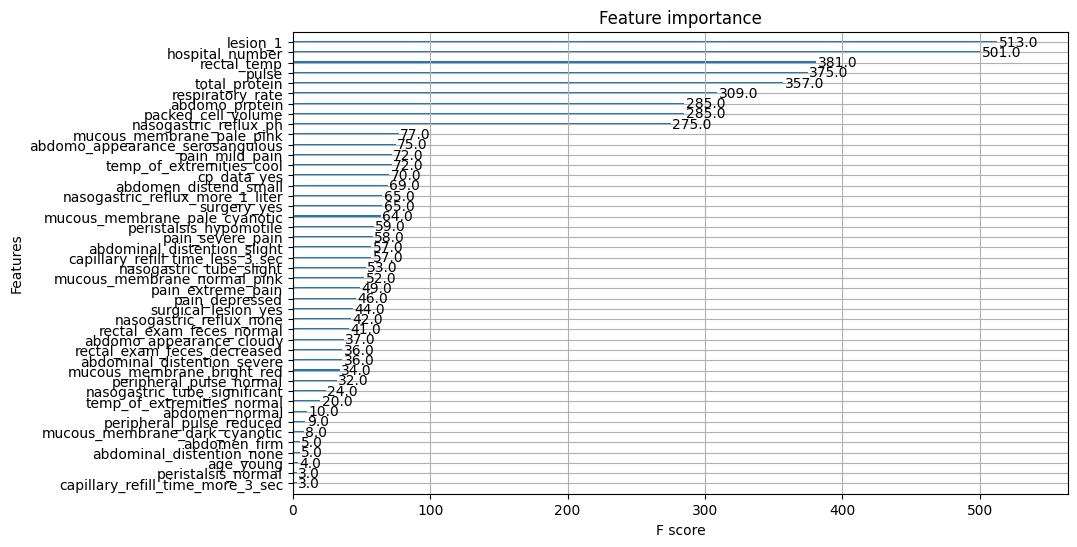

In [13]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Entrenar el modelo XGBoost como se mostró anteriormente

# Crear una figura con un tamaño personalizado
fig, ax = plt.subplots(figsize=(10, 6))

# Visualizar la importancia de las características
xgb.plot_importance(model, ax=ax)

# Mostrar la figura
plt.show()

In [14]:
""" import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Deshabilitar las advertencias
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Define el espacio de búsqueda de hiperparámetros
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Crea el modelo base
model = xgb.XGBClassifier()

# Realiza la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

# Obtiene el mejor modelo
best_model = grid_search.best_estimator_

# Realiza predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Mejor modelo: {best_model}')
print(f'Accuracy en el conjunto de prueba: {accuracy}')
print('Confusion Matrix (conjunto de prueba):')
print(conf_matrix)


warnings.filterwarnings('default', category=FutureWarning)
warnings.filterwarnings('default', category=DeprecationWarning)
 """


" import pandas as pd\nimport xgboost as xgb\nfrom sklearn.model_selection import train_test_split, GridSearchCV\nfrom sklearn.metrics import accuracy_score\n\n# Deshabilitar las advertencias\nwarnings.filterwarnings('ignore', category=FutureWarning)\nwarnings.filterwarnings('ignore', category=DeprecationWarning)\n\n# Define el espacio de búsqueda de hiperparámetros\nparam_grid = {\n    'learning_rate': [0.1, 0.01, 0.001],\n    'n_estimators': [100, 200, 300],\n    'max_depth': [3, 4, 5],\n    'min_child_weight': [1, 2, 3],\n    'subsample': [0.8, 0.9, 1.0],\n    'colsample_bytree': [0.8, 0.9, 1.0]\n}\n\n# Crea el modelo base\nmodel = xgb.XGBClassifier()\n\n# Realiza la búsqueda de cuadrícula\ngrid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)\ngrid_search.fit(X_train, y_train)\n\n# Obtiene el mejor modelo\nbest_model = grid_search.best_estimator_\n\n# Realiza predicciones en el conjunto de prueba\ny_pred = best_model.predict(X_test)\naccuracy 

In [15]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Deshabilitar las advertencias
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Dividir el conjunto de datos en entrenamiento y prueba (puedes personalizar esto según tus necesidades)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Crear el modelo XGBoost
model = xgb.XGBClassifier()

# Realizar validación cruzada k-fold
k = 2  # Puedes ajustar el número de folds según tu preferencia
scores = cross_val_score(model, X_train, y_train, cv=k, scoring='accuracy')

# Entrenar el modelo en el conjunto de entrenamiento completo
model.fit(X_train, y_train)

# Evaluación del modelo en el conjunto de prueba
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy (conjunto de prueba): {accuracy}')
print('Confusion Matrix (conjunto de prueba):')
print(conf_matrix)
print('Classification Report (conjunto de prueba):')
print(classification_rep)

print(f'Accuracy (validación cruzada): {scores.mean()}')
print(f'Standard Deviation (validación cruzada): {scores.std()}')


warnings.filterwarnings('default', category=FutureWarning)
warnings.filterwarnings('default', category=DeprecationWarning)


Accuracy (conjunto de prueba): 0.7032258064516129
Confusion Matrix (conjunto de prueba):
[[53  2 16]
 [ 4  9  6]
 [13  5 47]]
Classification Report (conjunto de prueba):
              precision    recall  f1-score   support

           0       0.76      0.75      0.75        71
           1       0.56      0.47      0.51        19
           2       0.68      0.72      0.70        65

    accuracy                           0.70       155
   macro avg       0.67      0.65      0.66       155
weighted avg       0.70      0.70      0.70       155

Accuracy (validación cruzada): 0.6412337662337662
Standard Deviation (validación cruzada): 0.01785714285714285


In [16]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Deshabilitar las advertencias
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Dividir el conjunto de datos en entrenamiento y prueba (puedes personalizar esto según tus necesidades)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define los parámetros del modelo (puedes ajustarlos según tus necesidades)
model_params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 3,
    'n_estimators': 200,
    'objective': 'multi:softprob',
    # Agrega otros parámetros según sea necesario
}

# Crea una instancia del modelo XGBClassifier con los parámetros especificados
model = xgb.XGBClassifier(**model_params)

# Realizar validación cruzada k-fold
k = 5  # Puedes ajustar el número de folds según tu preferencia
scores = cross_val_score(model, X_train, y_train, cv=k, scoring='accuracy')

# A continuación, ajusta el modelo a tus datos de entrenamiento (reemplaza X_train e y_train con tus datos reales)
model.fit(X_train, y_train)

# Evaluación del modelo en el conjunto de prueba
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy (conjunto de prueba): {accuracy}')
print('Confusion Matrix (conjunto de prueba):')
print(conf_matrix)
print('Classification Report (conjunto de prueba):')
print(classification_rep)

print(f'Accuracy (validación cruzada): {scores.mean()}')
print(f'Standard Deviation (validación cruzada): {scores.std()}')


warnings.filterwarnings('default', category=FutureWarning)
warnings.filterwarnings('default', category=DeprecationWarning)

Accuracy (conjunto de prueba): 0.6903225806451613
Confusion Matrix (conjunto de prueba):
[[51  3 17]
 [ 5 10  4]
 [12  7 46]]
Classification Report (conjunto de prueba):
              precision    recall  f1-score   support

           0       0.75      0.72      0.73        71
           1       0.50      0.53      0.51        19
           2       0.69      0.71      0.70        65

    accuracy                           0.69       155
   macro avg       0.65      0.65      0.65       155
weighted avg       0.69      0.69      0.69       155

Accuracy (validación cruzada): 0.6834906897456071
Standard Deviation (validación cruzada): 0.03238222880650524
